In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Define Errors/Values

In [46]:
dAngle = 1/60 #### 1 arcsecond
dWavelength = 0 #assuming absolute value given
dOrder = 0 #assuming order has no error

In [47]:
sim_dAngle = 1/3600

Functions

In [48]:
def Angle_Convert(deg,arcmin,arcsec):
    """Returns angles in degrees when given angles degrees arcminutes and arcseconds"""
    return (deg + (arcmin/60) + (arcsec / 3600)) 

In [49]:
def Grating_Constant(wavelength,angle,order):
    """angle is angle in degrees"""
    return (np.sin(angle*(np.pi/180))/(wavelength*order))

In [50]:
def GratingConstant_Error(dAngle,dWavelength,dOrder,GrateConst,Angle,Wavelength,Order):
    return GrateConst*(np.sqrt(np.sin((dAngle/Angle)*(np.pi/180)**2+(dOrder/Order)**2+(dWavelength/Wavelength)**2)))

In [51]:
def GetWavelength(d,angle,order):
    return ((d*np.sin(angle*(np.pi/180)))/order)

In [52]:
def GetWavelength_Error(wavelength,d,angle,order,dAngle,dOrder):
    return  wavelength* np.sqrt(
        ((d*np.sin((dAngle/angle)**2)) + ((dOrder/order)**2))

    )

Wavelengths (nanometers)

In [53]:
Sodium_Lamp_Wavelengths = {
    "Green":568.8205,
    "Red":616,
    "Dark Yellow":589.5924,
    "Light Yellow":588.995,
    "Dark Blue":466.8557
}

In [54]:
Mercury_Lamp_Wavelengths = {
    "Dark Blue":404.656,
    "Light Blue":435.835,
    "Dark Green":546.074,
    "Yellow":576.959
}

In [55]:
# Approximate

Cadmium_Lamp_Wavelengths = {
    "Dark Blue":467.815,
    "Light Blue":479.912,
    "Teal":508.582,
    "Dark Red":609.910,
    "Light Red":643.847,
}

In [56]:
# Approximate


Helium_wavelengths = {
    
    "Dark Blue":447.148,
    "Dark Teal":471.314 ,
    "Teal":492.193,
    "Yellow":587.562,
    "Red":667.815
}

Angles in Degrees (First Order)

Simulation

In [57]:
UnknownGrating_Helium_Angles = {"Purple":np.mean([Angle_Convert(12,0,20),Angle_Convert(11,0,50)]),
                        "Dark Blue":np.mean([Angle_Convert(12,39,40),Angle_Convert(12,39,0)]),
                        "Dark Teal":np.mean([Angle_Convert(13,14,0),Angle_Convert(12,39,0)]),
                        "Teal":np.mean([Angle_Convert(13,29,0),Angle_Convert(13,48,20)]),
                        "Yellow":np.mean([Angle_Convert(15,51,20),Angle_Convert(15,50,0)]),
                        "Red":np.mean([Angle_Convert(18,5,40),Angle_Convert(18,5,0)])
                        }


In [58]:
Simulation_Cadmium_300_Angles = {
    "Dark Blue":np.mean([Angle_Convert(8,4,30),Angle_Convert(8,3,40)]),
    "Light Blue":np.mean([Angle_Convert(8,17,0),Angle_Convert(8,16,0)]),
    "Teal":np.mean([Angle_Convert(8,47,30),Angle_Convert(8,46,20)]),
    "Dark Red":np.mean([Angle_Convert(10,32,20),Angle_Convert(10,31,40)]),
    "Light Red":np.mean([Angle_Convert(11,8,20),Angle_Convert(11,6,40)])
}

In [59]:
Simulation_Sodium_300_Angles = {
    "Dark Yellow":np.mean([Angle_Convert(10,11,0),Angle_Convert(10,10,20)]),
    "Light Yellow":np.mean([Angle_Convert(9,50,0),Angle_Convert(9,49,0)])
}

In [60]:
Simulation_Sodium_600_Angles = {
    "Dark Yellow":np.mean([Angle_Convert(20,41,20),Angle_Convert(20,42,0)]),
    "Light Yellow":np.mean([Angle_Convert(19,57,0),Angle_Convert(19,57,40)])
}

Physical

In [61]:
Mercury_Error = 0.1 
Mercury_Grating_Distance = 1/600*(1e6)

Mercury_Lamp_Physical_Angles = {
    "Purple":np.mean([15.8,14.1]),
    "Dark Blue":np.mean([16.8,15.2]),
    "Light Blue":np.mean([17.2,16.8]),
    "Dark Green":np.mean([18.1,17.4]),
    "Light Green":np.mean([19.1,18.9]),
    "Yellow":np.mean([20.8,19.1])
}

In [62]:
Sodium_Lamp_Physical_Grating_Distance = 1/300*(1e6)

Sodium_Lamp_Physical_Angles = {
    "Green":np.mean([Angle_Convert(10,2,0),Angle_Convert(10,19,0),10.567,Angle_Convert(9,32,0),Angle_Convert(10,21,0),Angle_Convert(9,50,0)]),
    "Red":np.mean([Angle_Convert(10,40,0),Angle_Convert(10,31,0),Angle_Convert(10,40,0),Angle_Convert(10,31,0),Angle_Convert(10,39,0),Angle_Convert(10,32,0)])
}

Task 1

In [63]:
Grating_Constant_Verified = np.mean([Grating_Constant(568.8205*(1e-6),Sodium_Lamp_Physical_Angles["Green"],1),Grating_Constant(616*(1e-6),Sodium_Lamp_Physical_Angles["Red"],1)])
Grating_Constant_Verified

np.float64(303.42931053264647)

In [64]:
GratingConstantError = GratingConstant_Error(dAngle,dWavelength,dOrder,Grating_Constant_Verified,Sodium_Lamp_Physical_Angles["Green"],Sodium_Lamp_Wavelengths["Green"],1)
GratingConstantError += GratingConstant_Error(dAngle,dWavelength,dOrder,Grating_Constant_Verified,Sodium_Lamp_Physical_Angles["Red"],Sodium_Lamp_Wavelengths["Red"],1)
GratingConstantError/2

np.float64(0.21257270581051063)

Task 2 Mercury Wavelength Verification

In [65]:
Mercury_d = 1/600 * (1e6)

Mercury_Calculated_wavelengths = {
    "Dark Blue":GetWavelength(Mercury_d,Mercury_Lamp_Physical_Angles["Dark Blue"],1),
    "Light Blue":GetWavelength(Mercury_d,Mercury_Lamp_Physical_Angles["Light Blue"],1),
    "Dark Green":GetWavelength(Mercury_d,Mercury_Lamp_Physical_Angles["Dark Green"],1),
    "Yellow":GetWavelength(Mercury_d,Mercury_Lamp_Physical_Angles["Yellow"],1)
}

In [66]:
Mercury_Calculated_Wavelengths_Errors = {
"Dark Blue":GetWavelength_Error(Mercury_Calculated_wavelengths["Dark Blue"],Mercury_d,Mercury_Lamp_Physical_Angles["Dark Blue"],1,dAngle,dOrder),
"Light Blue":GetWavelength_Error(Mercury_Calculated_wavelengths["Light Blue"],Mercury_d,Mercury_Lamp_Physical_Angles["Light Blue"],1,dAngle,dOrder),
"Dark Green":GetWavelength_Error(Mercury_Calculated_wavelengths["Dark Green"],Mercury_d,Mercury_Lamp_Physical_Angles["Dark Green"],1,dAngle,dOrder),
"Yellow":GetWavelength_Error(Mercury_Calculated_wavelengths["Yellow"],Mercury_d,Mercury_Lamp_Physical_Angles["Yellow"],1,dAngle,dOrder)

}

In [67]:
print(Mercury_Calculated_wavelengths)
print(Mercury_Calculated_Wavelengths_Errors)

{'Dark Blue': np.float64(459.395593028332), 'Light Blue': np.float64(487.2861745378946), 'Dark Green': np.float64(508.10716504668466), 'Yellow': np.float64(568.6666278144531)}
{'Dark Blue': np.float64(19.536194322961528), 'Light Blue': np.float64(19.503308600172133), 'Dark Green': np.float64(19.477359765515068), 'Yellow': np.float64(19.394918851218954)}


Task 3 Offset Error

In [68]:
def Offset(wavelength,trueWavelength):
    return ((wavelength-trueWavelength)/trueWavelength)*100

In [69]:
Sodium_Lamp_Grating_600 = 1/600*(1e6)

Simulation_Sodium_Wavelengths = {
    "Dark Yellow 300":GetWavelength(Sodium_Lamp_Physical_Grating_Distance,Simulation_Sodium_300_Angles["Dark Yellow"],1),
    "Dark Yellow 600":GetWavelength(Sodium_Lamp_Grating_600,Simulation_Sodium_600_Angles["Dark Yellow"],1),
    "Light Yellow 300":GetWavelength(Sodium_Lamp_Physical_Grating_Distance,Simulation_Sodium_300_Angles["Light Yellow"],1),
    "Light Yellow 600":GetWavelength(Sodium_Lamp_Grating_600,Simulation_Sodium_600_Angles["Light Yellow"],1)
   
}

In [70]:
print(Simulation_Sodium_Wavelengths)

{'Dark Yellow 300': np.float64(589.010019377885), 'Dark Yellow 600': np.float64(588.9735648415709), 'Light Yellow 300': np.float64(568.7981608574622), 'Light Yellow 600': np.float64(568.8185319299456)}


In [71]:
Simulation_Sodium_Wavelength_Means = {
     "Dark Yellow Mean":np.mean([Simulation_Sodium_Wavelengths["Dark Yellow 300"],Simulation_Sodium_Wavelengths["Dark Yellow 600"]]),
     "Light Yellow Mean":np.mean([Simulation_Sodium_Wavelengths["Light Yellow 300"],Simulation_Sodium_Wavelengths["Light Yellow 600"]]),
}

In [72]:
print(Simulation_Sodium_Wavelength_Means)

{'Dark Yellow Mean': np.float64(588.991792109728), 'Light Yellow Mean': np.float64(568.8083463937039)}


In [73]:
mean_percent_difference = np.mean(np.mean([Offset(Simulation_Sodium_Wavelength_Means['Dark Yellow Mean'],Sodium_Lamp_Wavelengths['Dark Yellow'])
,Offset(Simulation_Sodium_Wavelength_Means['Light Yellow Mean'],Sodium_Lamp_Wavelengths['Light Yellow'])]))
mean_percent_difference

np.float64(-1.7645865359813477)

In [74]:
print(f"The mean Percent Difference between the true wavelength and the measured wavelength is {mean_percent_difference}")


The mean Percent Difference between the true wavelength and the measured wavelength is -1.7645865359813477


In [75]:
print(f"The mean Percent Difference between the true wavelength and the measured wavelength is {np.mean([1,3])}")
   
Offset(Simulation_Sodium_Wavelength_Means["Dark Yellow Mean"],Sodium_Lamp_Wavelengths["Dark Yellow"])
Offset(Simulation_Sodium_Wavelength_Means["Light Yellow Mean"],Sodium_Lamp_Wavelengths["Light Yellow"])

The mean Percent Difference between the true wavelength and the measured wavelength is 2.0


np.float64(-3.4273047489870185)

Task 4 Cadmium Lamp Verification

In [76]:
Simulated_Cadmium_Wavelengths = {
    "Dark Blue":GetWavelength(Sodium_Lamp_Physical_Grating_Distance,Simulation_Cadmium_300_Angles["Dark Blue"],1),
    "Light Blue":GetWavelength(Sodium_Lamp_Physical_Grating_Distance,Simulation_Cadmium_300_Angles["Light Blue"],1),
    "Teal":GetWavelength(Sodium_Lamp_Physical_Grating_Distance,Simulation_Cadmium_300_Angles["Teal"],1),
    "Dark Red":GetWavelength(Sodium_Lamp_Physical_Grating_Distance,Simulation_Cadmium_300_Angles["Dark Red"],1),
    "Light Red":GetWavelength(Sodium_Lamp_Physical_Grating_Distance,Simulation_Cadmium_300_Angles["Light Red"],1)
}

In [77]:
Simulated_Cadmium_Wavelength_Errors = {
    "Dark Blue":GetWavelength_Error(Simulated_Cadmium_Wavelengths["Dark Blue"],Sodium_Lamp_Physical_Grating_Distance,Simulation_Cadmium_300_Angles["Dark Blue"],1,sim_dAngle,dOrder),
    "Light Blue":GetWavelength_Error(Simulated_Cadmium_Wavelengths["Light Blue"],Sodium_Lamp_Physical_Grating_Distance,Simulation_Cadmium_300_Angles["Light Blue"],1,sim_dAngle,dOrder),
    "Teal":GetWavelength_Error(Simulated_Cadmium_Wavelengths["Teal"],Sodium_Lamp_Physical_Grating_Distance,Simulation_Cadmium_300_Angles["Teal"],1,sim_dAngle,dOrder),
    "Dark Red":GetWavelength_Error(Simulated_Cadmium_Wavelengths["Dark Red"],Sodium_Lamp_Physical_Grating_Distance,Simulation_Cadmium_300_Angles["Dark Red"],1,sim_dAngle,dOrder),
    "Light Red":GetWavelength_Error(Simulated_Cadmium_Wavelengths["Light Red"],Sodium_Lamp_Physical_Grating_Distance,Simulation_Cadmium_300_Angles["Light Red"],1,sim_dAngle,dOrder)
}

In [78]:
print(Simulated_Cadmium_Wavelengths)
print('\n')
print(Simulated_Cadmium_Wavelength_Errors)

{'Dark Blue': np.float64(467.83078833638456), 'Light Blue': np.float64(479.74808398888587), 'Teal': np.float64(508.91469792456354), 'Dark Red': np.float64(609.3584304575381), 'Light Red': np.float64(643.1670596113235)}


{'Dark Blue': np.float64(0.9299439889179082), 'Light Blue': np.float64(0.9297841068620022), 'Teal': np.float64(0.9293754162305989), 'Dark Red': np.float64(0.927777568189946), 'Light Red': np.float64(0.9271727215992451)}


Task 5 Unknown Grating Constant

In [79]:
Sim_Hel_Wavelength = np.array([447.148,471.314,492.193,587.562,667.815])
Sim_Hel_Angles = np.array([UnknownGrating_Helium_Angles["Dark Blue"],UnknownGrating_Helium_Angles["Dark Teal"],UnknownGrating_Helium_Angles["Teal"],UnknownGrating_Helium_Angles["Yellow"],UnknownGrating_Helium_Angles["Red"]])

Text(0, 0, 'Plot of Sin(θ) against λ (nm) where the gradient of the curve is equal to the grating constant * the order of the spectrum')

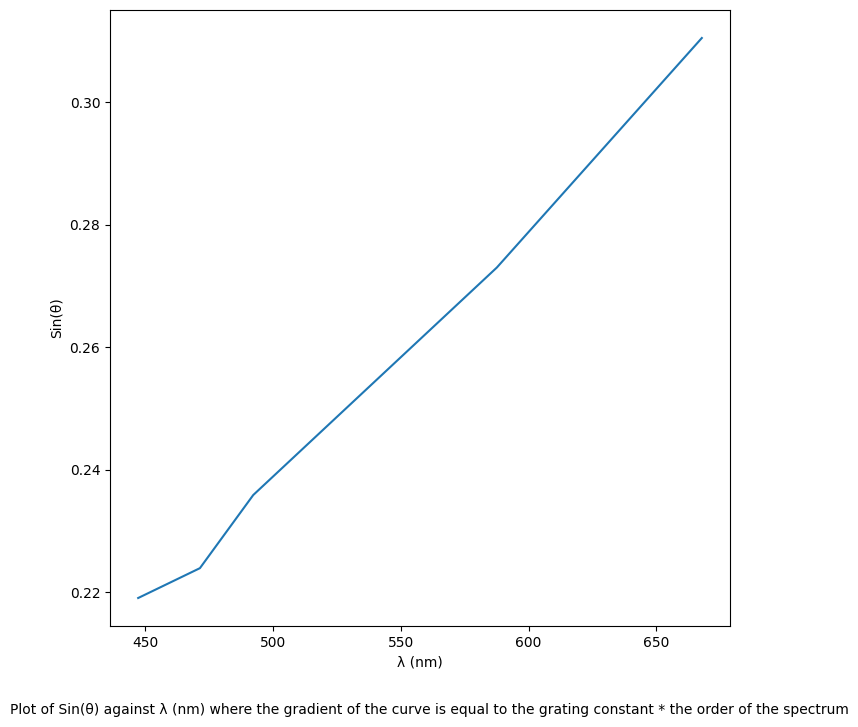

In [80]:
plt.figure(figsize=(8,8))
plt.plot(Sim_Hel_Wavelength,np.sin(Sim_Hel_Angles*(np.pi/180)))
plt.ylabel("Sin(θ)")
plt.xlabel("λ (nm)")
plt.figtext(0,0,"Plot of Sin(θ) against λ (nm) where the gradient of the curve is equal to the grating constant * the order of the spectrum")

In [81]:
np.mean(np.gradient(np.sin(Sim_Hel_Angles*(np.pi/180)),Sim_Hel_Wavelength*1e-6))

np.float64(407.7719754985145)

In [82]:
Data = pd.DataFrame({"Wavelength_nm":Sim_Hel_Wavelength,
                     "Angles":Sim_Hel_Angles})

In [83]:
coefficients = np.polynomial.polynomial.polyfit(Data["Wavelength_nm"]*1e-6,np.sin(Data["Angles"]*(np.pi/180)),1)
coefficients

array([2.90524595e-02, 4.19049992e+02])

In [84]:
cov = (np.cov(Data["Wavelength_nm"]*1e-6,np.sin(Data["Angles"]*(np.pi/180))))

In [85]:
cov[0][1] + cov[1][0]

np.float64(7.122346063869761e-06)

In [86]:
np.polynomial.polynomial.Polynomial(coefficients,)

Polynomial([2.90524595e-02, 4.19049992e+02], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [87]:
Data.describe()

,Wavelength_nm,Angles
count,5.000000,5.000000
mean,533.206400,14.635000
std,92.185713,2.299939
min,447.148000,12.655556
25%,471.314000,12.941667
50%,492.193000,13.644444
75%,587.562000,15.844444
max,667.815000,18.088889


In [88]:
#GetWavelength_Error(Sim_Hel_Wavelength,)